# Introductory applied machine learning (INFR10069)

# Assignment 3: Object recognition

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

Fill out this notebook, save it, and submit it **and a `.txt` file** (see Part 2) in answer to this assignment.
**You need to submit these two files electronically as described below.**

On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

`submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt`

What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.

**Distance Learners:** To copy your work up to DICE (such that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files up using `student.ssh.inf.ed.ac.uk`, then ssh in to submit, e.g. (in a unix terminal):
```
filename1=07_Assignment_3.ipynb
local_scp_filepath1=~/git/iaml2017/${filename1}
filename2=assignment_3_predictions.txt
local_scp_filepath2=~/git/iaml2017/${filename2}
UUN=s0816700
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
scp -r ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
# rsync -rl ${local_scp_filepath1} ${UUN}@${server_address}:${filename1}
# rsync -rl ${local_scp_filepath2} ${UUN}@${server_address}:${filename2}
ssh ${UUN}@${server_address}
ssh student.login
submit iaml cw2 07_Assignment_3.ipynb assignment_3_predictions.txt
```

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

## Important Instructions

1. You *MUST* have your environment set up as in the [README](https://github.com/JamesOwers/iaml2017) and you *must activate this environment before running this notebook*:
```
source activate iaml
cd iaml_2017
jupyter notebook
# Navigate to this file
```

1. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

1. The .csv files that you will be using are located at `./datasets` (the `datasets` directory is adjacent to this file).

1. **IMPORTANT:** Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

## Imports

Include all required imports and execute the cell below. It's typical to include package imports at the top of the file for clarity.

In [1]:
from __future__ import print_function, division
%matplotlib inline
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
KNeighboursClassifier = KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## Description of the dataset
In this assignment our goal is to recognize objects in images of realistic scenes. There are 19 different classes of object e.g. person, dog, cat, car, etc. The dataset derives from several thousands photographs harvested from the web. Each object of a relevant class has been manually annotated with a bounding box. Images can contain none, one or multiple objects of each class. We have prepared a [website](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) where you can view the images.

We are going to detect whether images contain a person or not - a binary classification problem. To save you time and to make the problem manageable with limited computational resources, we have preprocessed the dataset. We will use the [Bag of Visual Words](https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision) representation. Each column of the dataset (which is not an lable), refers to a 'visual word'. Each image is represented by a 500 dimensional vector that contains the normalized count for each of 500 different visual words present in the respective image (a similar representation is used for the spambase dataset, just for real words). See the Appendix at the bottom of the notebook for more information. The image data is thus a $N \times 500$ dimensional matrix where `N` is the number of images.

The full dataset has 520 attributes (dimensions). The first attribute (`imgID`) contains the image ID which allows you to associate a data point with an actual image. The next 500 attributes (`dim1`, ..., `dim500`) are a normalized count vector for each visual word. The last 19 attributes (`is_class`) are the labels - 1 means the class is present in the image. In most of the experiments (unless explicitly noted otherwise) you will only need the `is_person` attribute and the 500 dimensional feature vector. **Do not use the additional class indicator attributes as features** unless explicitly told to do so. 

In Part A we provide you with a training (`train_images partA.csv`) and a validation (`valid_images partA .csv`) dataset. In Part B we provide three data sets: a training set (`train_images partB.csv`), a validation set (`valid_images partB.csv`), and a test set (`test_images partB.csv`). The training and validation set contain valid labels. In the test set the labels are missing. The files are available from the GitHub repository. 

**Important**: *Throughout the assignment you will be given various versions of the dataset that are relevant
to a particular question. Please be careful to use the correct version of the dataset when instructed to do so.
If you use the wrong version of the dataset by mistake no marks will be awarded.*

## 1. Exploration of the dataset [70%]

### ========== Question 1.1 --- [1 mark] ==========
Create two Pandas DataFrame objects called `train_A` and `valid_A` by loading the datasets `train_images_partA.csv` and `valid_images_partA.csv`. Display the number of data points and attributes in each of the two datasets.

In [2]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')
print("The number of data points in train A are {}" .format(train_A.shape[0]))
print("The number attributes in train A are {}" .format(train_A.shape[1]))


data_path_2 = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path_2, delimiter = ',')
print("The number of data points in valid A are {}" .format(valid_A.shape[0]))
print("The number attributes in valid A are {}" .format(valid_A.shape[1]))

The number of data points in train A are 2093
The number attributes in train A are 520
The number of data points in valid A are 1113
The number attributes in valid A are 520


### ========== Question 1.2 --- [1 mark] ==========
Display and inspect the first 10 instances in the training dataset.

In [3]:
train_A.head(10)

,imgId,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,is_cow,is_diningtable,is_dog,is_horse,is_motorbike,is_person,is_pottedplant,is_sheep,is_sofa,is_tvmonitor
0,2008_000008,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,...,0,0,0,1,0,1,0,0,0,0
1,2008_000015,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,...,0,0,0,0,0,0,0,0,0,0
2,2008_000019,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,...,0,0,1,0,0,0,0,0,0,0
3,2008_000023,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,...,0,0,0,0,0,1,0,0,0,1
4,2008_000028,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,...,0,0,0,0,0,0,0,0,0,0
5,2008_000033,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,...,0,0,0,0,0,0,0,0,0,0
6,2008_000036,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,...,0,0,0,0,0,1,0,0,0,0
7,2008_000037,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,2008_000041,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,...,0,1,0,0,0,1,0,0,0,0
9,2008_000045,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,...,0,0,0,0,0,0,0,0,0,0


### ========== Question 1.3 --- [1 mark] ==========
Select the attributes (i.e. input features) for training our classifiers. These should be the visual word normalised counts `dim1, dim2, ..., dim500`. Create a list of the **names** of the attributes of interest. 

In [4]:
list = []
for i in range(1, 501):
    list.append(train_A.columns[i])
print (list)

['dim1', 'dim2', 'dim3', 'dim4', 'dim5', 'dim6', 'dim7', 'dim8', 'dim9', 'dim10', 'dim11', 'dim12', 'dim13', 'dim14', 'dim15', 'dim16', 'dim17', 'dim18', 'dim19', 'dim20', 'dim21', 'dim22', 'dim23', 'dim24', 'dim25', 'dim26', 'dim27', 'dim28', 'dim29', 'dim30', 'dim31', 'dim32', 'dim33', 'dim34', 'dim35', 'dim36', 'dim37', 'dim38', 'dim39', 'dim40', 'dim41', 'dim42', 'dim43', 'dim44', 'dim45', 'dim46', 'dim47', 'dim48', 'dim49', 'dim50', 'dim51', 'dim52', 'dim53', 'dim54', 'dim55', 'dim56', 'dim57', 'dim58', 'dim59', 'dim60', 'dim61', 'dim62', 'dim63', 'dim64', 'dim65', 'dim66', 'dim67', 'dim68', 'dim69', 'dim70', 'dim71', 'dim72', 'dim73', 'dim74', 'dim75', 'dim76', 'dim77', 'dim78', 'dim79', 'dim80', 'dim81', 'dim82', 'dim83', 'dim84', 'dim85', 'dim86', 'dim87', 'dim88', 'dim89', 'dim90', 'dim91', 'dim92', 'dim93', 'dim94', 'dim95', 'dim96', 'dim97', 'dim98', 'dim99', 'dim100', 'dim101', 'dim102', 'dim103', 'dim104', 'dim105', 'dim106', 'dim107', 'dim108', 'dim109', 'dim110', 'dim111

### ========== Question 1.4 --- [1 mark] ==========
By using the list from Question 1.3 now create 4 numpy arrays `X_tr`, `X_val`, `y_tr` and `y_val` in which to store the training features, validation features, training targets, and validation targets, respectively. Your target vectors should correspond to the `is_person` attribute of the training and validation sets. Display the dimensionalities (i.e shapes) of the 4 arrays. 

Check this carefully - you will be penalised in following questions if the data is not correct!

In [5]:
X_tr = train_A[list]
X_val = valid_A[list]
y_tr = train_A['is_person']
y_val = valid_A['is_person']
print ("The dimensionality of the training features set is {}" .format(X_tr.shape))
print ("The dimensionality of the validation features set is {}" .format(X_val.shape))
print ("The dimensionality of the training targets set is {}" .format(y_tr.shape))
print ("The dimensionality of the validation targets set is {}" .format(y_val.shape))

The dimensionality of the training features set is (2093, 500)
The dimensionality of the validation features set is (1113, 500)
The dimensionality of the training targets set is (2093,)
The dimensionality of the validation targets set is (1113,)


### ========== Question 1.5 --- [2 marks] ==========
Create a [countplots](https://seaborn.github.io/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot) for the training and validation targets. Create a single figure, and put the two plots inside the single figure. Label axes appropriately and add a title to your plot. Use descriptive `xticklabels` instead of the default numeric ones.

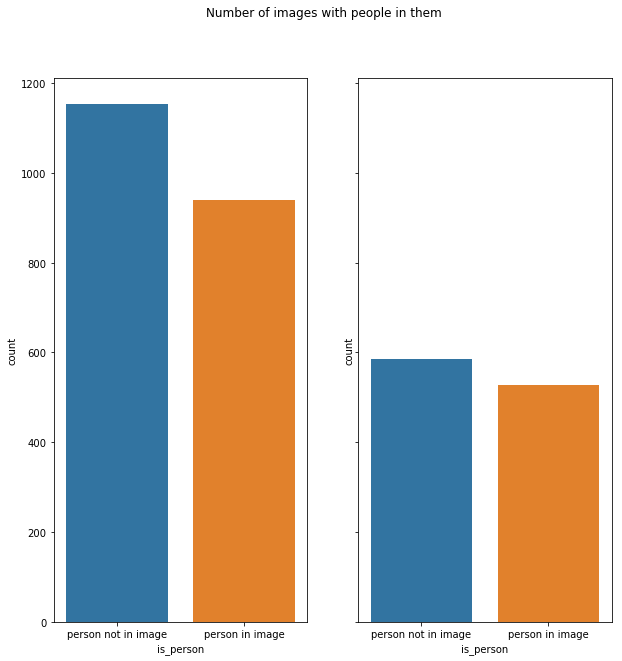

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)
fig.suptitle('Number of images with people in them')
sns.countplot(y_tr, ax = ax[0])
ax[0].set_xticklabels(['person not in image', 'person in image'])
sns.countplot(y_val, ax = ax[1])
ax[1].set_xticklabels(['person not in image', 'person in image'])
plt.show()

### ========== Question 1.6 --- [1 mark] ==========
We want to make a baseline classification accuracy to beat. Pick a baseline "dummy" classifier, describe in a sentence why you chose it, and report the accuracy it achieves on the validation set?

A reasonable baseline against which to compare performance is a classifier that classifies everything as the class with the highest prior probability, i.e. the class that occurs most frequently in the training data. In our case, this is class 0 i.e. the person is not in the image

In [7]:
cla = DummyClassifier(strategy = 'prior')
cla.fit(X_tr, y_tr)
acc_score = cla.score(X_val, y_val)
print("The accuracy on the set is {}" .format(np.round(acc_score, decimals = 3)))

The accuracy on the set is 0.527


### ========== Question 1.7 --- [3 marks] ==========
Train a [`LogisticRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier using default settings, except for the `solver` parameter which you should set to `lbfgs`. Report the classification accuracy score on the training and validation sets and compare with the baseline. Comment on the results with 1-2 sentences. You may include any additional plot(s) if you wish to justify your explanation.

The accuracy on the training set is 0.551
The accuracy on the validation set is 0.527


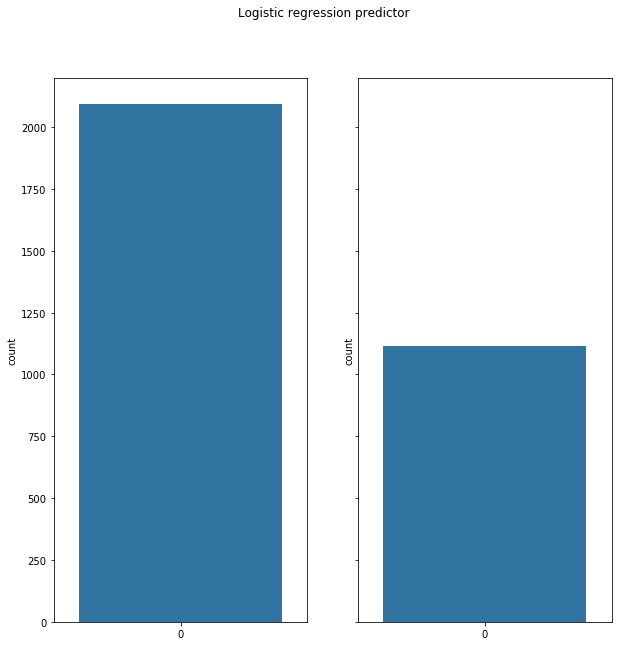

In [8]:
lr = LogisticRegression(solver = 'lbfgs')
lr.fit(X_tr, y_tr)
print("The accuracy on the training set is {}" .format(np.round(lr.score(X_tr, y_tr), decimals = 3)))
print("The accuracy on the validation set is {}" .format(np.round(lr.score(X_val, y_val), decimals = 3)))

fig, ax = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)
fig.suptitle('Logistic regression predictor')
sns.countplot(lr.predict(X_tr), ax = ax[0])
sns.countplot(lr.predict(X_val), ax = ax[1])
plt.show()

The logistic regression classifier is predicting all values as 0 (person not in image) as we can see from the above graph, therefore it is only performing as well as the baseline classifier.

### ========== Question 1.8 --- [1 mark] ==========
Display the means and standard deviations of the first 5 features in the training set. *Hint: you want to compute the means and standard deviations for each column in your arrays. Make sure you make appropriate use of the `axis` parameter.*

In [9]:
print ("The means are")
print(np.round(X_tr.mean(axis = 0), decimals = 4).head(5))

print("The standard deviations are")
print( )
print(np.round(X_tr.std(axis = 0), decimals = 4).head(5))

The means are
dim1    0.0018
dim2    0.0008
dim3    0.0043
dim4    0.0019
dim5    0.0023
dtype: float64
The standard deviations are

dim1    0.0012
dim2    0.0014
dim3    0.0037
dim4    0.0013
dim5    0.0016
dtype: float64


### ========== Question 1.9 --- [3 marks] ==========
Feature standardisation is a pre-processing technique used to transform data so that they have zero mean and unit standard deviation. For many algorithms, this is a very important step for training models (both regression and classification). Read about [feature standardisation](http://scikit-learn.org/0.17/modules/preprocessing.html) and make sure you understand what kind of transformation this method applies to the data.

`Scikit-learn` offers a [class](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) for feature standardisation. Instansiate a StandardScaler object and fit it using the **training features**. Use this fitted object to transform both your training and validation features to have a standard scale. 

Once your training and validation input data have been transformed, display the means and standard deviations of the first 5 attributes for **both** the training and validation sets. Are the results as you expected? Explain your answer in 2-3 sentences. Why didn't we use the validation set to standardise the data?

**IMPORTANT: You should use the transformed data for the rest of this part.**

In [10]:
scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)

for i in range(5):
    print("The mean for training attribute {} is {}" .format(i+1, np.round(X_tr[:, i].mean(), decimals = 3)))
    print("The standard deviation for training attribute {} is {}" .format(i+1, np.round(X_tr[:, i].std(), decimals = 3)))
    print ()
          
for i in range(5):
    print("The mean for validation attribute {} is {}" .format(i+1, np.round(X_val[:, i].mean(), decimals = 3)))
    print("The standard deviation for validation attribute {} is {}" .format(i+1, np.round(X_val[:, i].std(), decimals = 3)))
    print ()

The mean for training attribute 1 is -0.0
The standard deviation for training attribute 1 is 1.0

The mean for training attribute 2 is -0.0
The standard deviation for training attribute 2 is 1.0

The mean for training attribute 3 is 0.0
The standard deviation for training attribute 3 is 1.0

The mean for training attribute 4 is 0.0
The standard deviation for training attribute 4 is 1.0

The mean for training attribute 5 is -0.0
The standard deviation for training attribute 5 is 1.0

The mean for validation attribute 1 is -0.006
The standard deviation for validation attribute 1 is 1.013

The mean for validation attribute 2 is -0.038
The standard deviation for validation attribute 2 is 0.97

The mean for validation attribute 3 is 0.109
The standard deviation for validation attribute 3 is 1.049

The mean for validation attribute 4 is 0.094
The standard deviation for validation attribute 4 is 1.057

The mean for validation attribute 5 is 0.031
The standard deviation for validation attribut

The results we get for the training data are as expected because the means for the attributes are 0 and the standard deviations are 1 so the data will now look like standard normally distributed data (with 0 mean and unit variance) more or less, which is what we want. 

The results for the the validation data are very close to zero mean and unit standard deviation too, so the validation data is similar to the training data.

A model shall be applied on unseen data which is in generally not available at the time the model is built. The validation process simulates this. So in order to get a good estimate of the model quality (and generalization power) we need to restrict to using the training set to standardize the data.

### ========== Question 1.10 --- [3 marks] ==========
By using the transformed input data, train a new `LogisticRegression` classifier. Again, set the `solver` parameter to `lbfgs` and use default settings for the other parameters. Report the classification accuracy on both the training and validation sets.

Comment on how your model compares to the baseline classifier from Question 1.6? You may use additional plot(s) to support your explanation.


The accuracy on the training set is 0.811
The accuracy on the validation set is 0.643



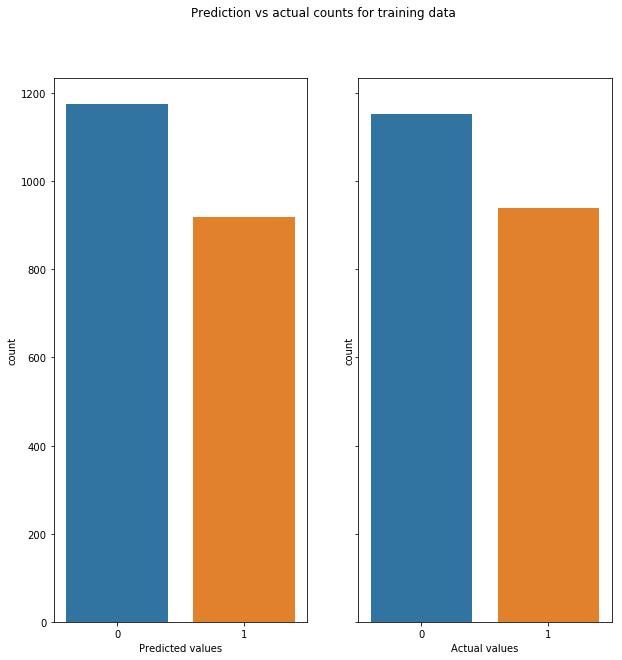

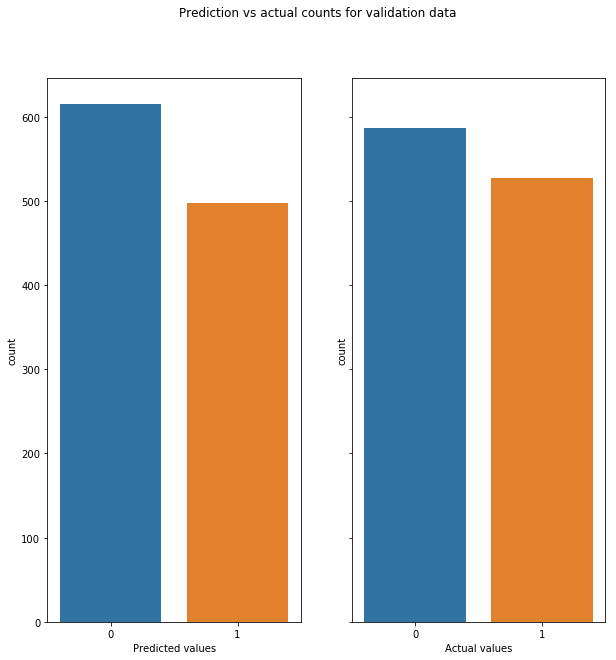

In [11]:
lr2 = LogisticRegression(solver = 'lbfgs')
lr2.fit(X_tr, y_tr)
print ( )
print("The accuracy on the training set is {}" .format(np.round(lr2.score(X_tr, y_tr), decimals = 3)))
print("The accuracy on the validation set is {}" .format(np.round(lr2.score(X_val, y_val), decimals = 3)))
print ( )

fig, ax = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)
fig.suptitle('Prediction vs actual counts for training data')
sns.countplot(lr2.predict(X_tr), ax = ax[0])
ax[0].set_xlabel('Predicted values')
sns.countplot(y_tr, ax = ax[1])
ax[1].set_xlabel('Actual values')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10,10), sharex=True, sharey=True)
fig.suptitle('Prediction vs actual counts for validation data')
sns.countplot(lr2.predict(X_val), ax = ax[0])
ax[0].set_xlabel('Predicted values')
sns.countplot(y_val, ax = ax[1])
ax[1].set_xlabel('Actual values')
plt.show()

Our model does better after training using the transformed input data as it clearly does not predict everything to be one class (like the baseline classifier), from the graphs above. It does however make a few errors in prediction as seen in the graph above for the validation data and the counts are slightly different. The classifier does quite well on the training data as expected to.  

### ========== Question 1.11 --- [1 mark] ==========
So far we have used default settings for training the logistic regression classifier. Now, we want to use [K-fold cross-validation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) to optimise the regularisation parameter `C`. The regularisation parameter controls the degree to which we wish to penalise large magnitudes in the weight vector. This can help us prevent overfitting but, if set too high, could lead us to underfit too.

Create a 3-fold cross-validation object. Set the `shuffle` parameter to `True` and the `random_state` to `0`. By using the cross-validation iterator, display the number of test samples for each fold.

In [12]:
kf = KFold(n_splits=3, shuffle = True, random_state = 0)
i = 1
for train_index, test_index in kf.split(X_tr):
    print ("Number of test samples in fold {} are {}" .format(i, len(test_index)))
    i +=1

Number of test samples in fold 1 are 698
Number of test samples in fold 2 are 698
Number of test samples in fold 3 are 697


### ========== Question 1.12 --- [2 marks] ========== 
Using the cross-validation iterator from the previous question, perform a search for the best value for `C`. 

We are going to loop over each CV fold, and each value of `C`. The values of `C` to search should be 20 equally-spaced values **in log space** ranging from `1e-5` to `1e5` *(hint: look at the `logspace()` function in numpy)*. 

Create a 2-dimensional array and, for each cross-validation fold and parameter setting pair, compute and store the classification accuracy score e.g. store the score of fold 0 with parameter setting 1 at score_array[0,1]. As previously, set the `solver` parameter to `lbfgs` and use default settings for the other parameters (except for `C` obviously!).

*(hint: you could use two loops in your code; one iterating over CV folds and another one iterating over the values for `C`)*. 

In [13]:
c_val = np.logspace(-5, 5, 20)
acc_score_arr = np.zeros([3,20])

i = 0
j = 0

for train_index, test_index in kf.split(X_tr):
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y_tr[train_index], y_tr[test_index]
   
    for c in c_val:
        lr3 = LogisticRegression(solver = 'lbfgs', C = c)
        lr3.fit(X_train, y_train)
        acc_score_arr[i, j] = np.round(lr3.score(X_test, y_test), decimals = 3)
        j += 1
    
    j = 0
    i += 1

acc_score_arr

array([[ 0.573,  0.629,  0.668,  0.672,  0.688,  0.696,  0.675,  0.67 ,
         0.653,  0.659,  0.659,  0.653,  0.649,  0.646,  0.646,  0.649,
         0.646,  0.646,  0.649,  0.649],
       [ 0.546,  0.632,  0.695,  0.719,  0.729,  0.735,  0.702,  0.675,
         0.655,  0.636,  0.632,  0.633,  0.626,  0.628,  0.628,  0.626,
         0.626,  0.626,  0.628,  0.626],
       [ 0.548,  0.636,  0.643,  0.656,  0.68 ,  0.7  ,  0.681,  0.67 ,
         0.663,  0.644,  0.633,  0.626,  0.624,  0.624,  0.624,  0.624,
         0.624,  0.624,  0.624,  0.624]])

### ========== Question 1.13 --- [1 mark] ========== 
Plot the mean classification performance (across CV folds) of the logistic regression classifier against the regularisation parameter `C` by using the range from Question 1.12. Use a logarithmic scale for the x-axis and label both axes appropriately. 

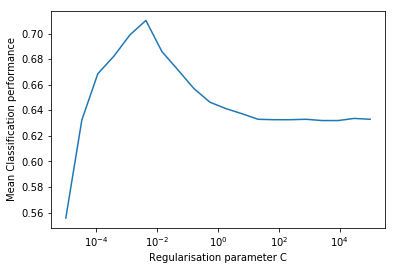

In [14]:
plt.plot(c_val, acc_score_arr.mean(axis = 0))
plt.xlabel("Regularisation parameter C")
plt.ylabel("Mean Classification performance")
plt.xscale("log")

### ========== Question 1.14 --- [2 marks] ==========
Display the optimal value for the regularisation parameter `C` determined by the search results from Question 1.12. Similarly to Question 1.13, consider the mean classifiation accuracy across CV folds. By using the optimal value (i.e. the one that yields the highest average classification accuracy) train a new `LogisticRegression` classifier and report the classification accuracy on the validation set. *(Hint: Do not pick the optimal value "by hand", instead use an appropriate numpy function).*

In [15]:
opt_c = c_val[np.argmax(acc_score_arr.mean(axis = 0))]
lr4 = LogisticRegression(solver = "lbfgs", C = opt_c)
lr4.fit(X_tr, y_tr)
print ("Classification accuracy on the validation set is {}" .format(np.round(lr4.score(X_val, y_val), decimals = 4)))
np.round(opt_c, decimals = 4)

Classification accuracy on the validation set is 0.6963


0.0043

### ========== Question 1.15 --- [1 mark] ========== 
Scikit-learn offers a [`LogisticRegressionCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) module which implements Logistic Regression with builtin cross-validation to find out the optimal `C` parameter. You can specify the range for the `C` parameter, as well as the cross-validation method you want to use with the `Cs` and `cv` parameters, respectively. Use the `C` range you set up in Question 1.12 and the 3-fold cross-validation iterator from Question 1.11. Once again, train the models by using the `lbfgs` optimisation method and display the optimal value for the parameter `C`. Finally, display the classification accuracy on the validation set. Check your results are consistent with those from Question 1.14!

In [16]:

lrc = LogisticRegressionCV(Cs = c_val, cv = kf, solver = 'lbfgs')
lrc.fit(X_tr, y_tr)
#lrc.Cs_ returns all values of C and lrc.C_ returns the optimal value
print ("The optimal value for the parameter C is {}" .format(np.round(lrc.C_[0], decimals = 4)))
print("The classification accuracy on the validation set is {}" .format(np.round(lrc.score(X_val, y_val), decimals = 4)))

The optimal value for the parameter C is 0.0043
The classification accuracy on the validation set is 0.6963


### ========== Question 1.16 --- [1 mark] ==========
Now, we want to validate the importance of various features for classification. For this purpose, we will use a [`RandomForestClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (you might want to refer to the labs if you are unsure how we can estimate feature importances with decision tree and random forest models).

Initialise a random forest classifier and fit the model by using training data only and 500 trees (i.e. `n_estimators`). Set the `RandomState` equal to 42 to ensure reproducible results. Report the accuracy score on both the training and validation sets.

In [17]:

clf = RandomForestClassifier(n_estimators = 500, random_state=42)
clf.fit(X_tr, y_tr)
print ("Accuracy score for the training set is {}" .format(np.round(clf.score(X_tr, y_tr), decimals = 4)))
print ("Accuracy score for validation set is {}" .format(np.round(clf.score(X_val, y_val), decimals = 4)))

Accuracy score for the training set is 1.0
Accuracy score for validation set is 0.6927


### ========== Question 1.17 --- [2 marks] ==========
Comment on the results above. Do you find the discrepancy between training and validation accuracies surprising?

The discrepancy is not very surprising as the max depth for the classifier while training hasn't been specified and the default values lead to fully grown and unpruned trees, so the random forrest has overfit to the training data and doesn't do as well on the validation data

### ========== Question 1.18 --- [2 marks] ==========
By using the random forest model from the previous question order the features by descending importance and display the names of the 50 most important features.

In [18]:
index = np.argsort(-clf.feature_importances_)
print ("The 50 most important features in descending value are")
print ("\n")

for i in range(50):
    print("{} {}" .format(i+1, list[index[i]]))

The 50 most important features in descending value are


1 dim21
2 dim51
3 dim360
4 dim4
5 dim479
6 dim76
7 dim283
8 dim461
9 dim343
10 dim398
11 dim348
12 dim74
13 dim485
14 dim356
15 dim330
16 dim217
17 dim263
18 dim222
19 dim134
20 dim500
21 dim274
22 dim254
23 dim206
24 dim423
25 dim347
26 dim17
27 dim326
28 dim90
29 dim92
30 dim329
31 dim214
32 dim322
33 dim289
34 dim54
35 dim440
36 dim427
37 dim73
38 dim35
39 dim77
40 dim312
41 dim315
42 dim96
43 dim288
44 dim483
45 dim299
46 dim48
47 dim442
48 dim201
49 dim344
50 dim294


### ========== Question 1.19 --- [3 marks] ==========
Next, we would like to test the performance of support vector machines. Train three support vector classifiers with the following kernels: linear, radial basis function, and polynomial. Report the classification accuracy of each of the three classifiers on both the training and validation sets.

In [19]:
from sklearn import svm

svm1 = SVC(kernel = 'linear')
svm2 = SVC(kernel = 'rbf')
svm3 = SVC(kernel = 'poly')

svm1.fit(X_tr, y_tr)
svm2.fit(X_tr, y_tr)
svm3.fit(X_tr, y_tr)

print ('Classfication accuracy for linear SVC on training set is {}' .format(np.round(svm1.score(X_tr, y_tr), decimals = 3)))
print ('Classfication accuracy for linear SVC on testing set is {}' .format(np.round(svm1.score(X_val, y_val), decimals = 3)))
print ('Classfication accuracy for rbf SVC on training set is {}' .format(np.round(svm2.score(X_tr, y_tr), decimals = 3)))
print ('Classfication accuracy for rbf SVC on testing set is {}' .format(np.round(svm2.score(X_val, y_val), decimals = 3)))
print ('Classfication accuracy for polynomial SVC on training set is {}' .format(np.round(svm3.score(X_tr, y_tr), decimals = 3)))
print ('Classfication accuracy for polynomial SVC on testing set is {}' .format(np.round(svm3.score(X_val, y_val), decimals = 3)))

Classfication accuracy for linear SVC on training set is 0.842
Classfication accuracy for linear SVC on testing set is 0.639
Classfication accuracy for rbf SVC on training set is 0.911
Classfication accuracy for rbf SVC on testing set is 0.73
Classfication accuracy for polynomial SVC on training set is 0.991
Classfication accuracy for polynomial SVC on testing set is 0.702


### ========== Question 1.20 --- [3 marks] ==========
At this point, we would like to get an idea of what kind of decision boundaries we can get with the three types of SVM kernels we introduced in the previous question. For visualisation, however, we can only make use of 2D input data. For this purpose, we select to use the 21st and 76th columns of our training features (*hint: remember that Python uses 0-based indexing*). 

Execute the cell below to define a useful function which we will be using to plot the decision boundaries *(it is also not a bad idea to try to understand what this functions does)*. 

Then train three distinct SVM classifiers by using the 2D input data mentioned above and default parameters:
* a linear SVC
* an RBF SVC 
* a polynomial SVC

Finally, create a list containing the three classifiers you have just trained. Use this list as an input to the provided function along with the used training features and observe the outcome. You can use the additional `title` parameter to set the titles in the subplots. Comment on the shape of the boundaries and what this means for classification accuracy in 1-2 sentences.

*(Acknowledgement: this Question has been heavily based on [this example](http://scikit-learn.org/0.17/auto_examples/svm/plot_iris.html) from scikit-learn's documentation.)*

In [20]:
def show_svc_decision_boundaries(clfs, X, title=None):
    """Plots decision boundaries for classifiers with 2D inputs.
    
    Parameters
    ----------
    clf : list
        Classifiers for which decision boundaries will be displayed.
    X : array
        Input features used to train the classifiers.
    title : list, optional
        Titles for classifiers.
    
    """
    
    assert X.shape[1] == 2 # Input should be 2D
    if title is not None:
        assert len(clfs) == len(title)
    
    h = .04 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    plt.figure(figsize=(15,5))
    for i, clf in enumerate(clfs):
        plt.subplot(1, len(clfs), i + 1)
        plt.subplots_adjust(wspace=0.4, hspace=0.4)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        # Training points
        plt.scatter(X[:, 0], X[:, 1], c=y_tr, cmap=plt.cm.Paired)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        if title is not None:
            plt.title(title[i])

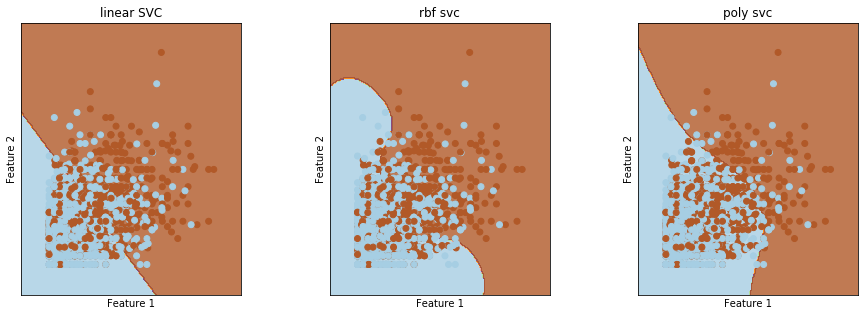

In [21]:
array_2d = X_tr[:, [20, 75]]

svm4 = SVC(kernel = 'linear')
svm5 = SVC(kernel = 'rbf')
svm6 = SVC(kernel = 'poly')

svm4.fit(array_2d, y_tr)
svm5.fit(array_2d, y_tr)
svm6.fit(array_2d, y_tr)

clfs = [svm4, svm5, svm6]
titles = ["linear SVC", "rbf svc", "poly svc"]

show_svc_decision_boundaries(clfs, array_2d, titles)

The shape of the boundaries correspond to the type of svc used obviously. The linear boundary obviously does not do well as we can see that the data cannot be divided linearly and as we see above that this model has the lowest classification accuracy above. The rbf does decently well because of the basis functions that give its shape with the the two peaks and the trough. It seems to do better than the polynomial giving a non linear decision boundary as a lot of the points near the peak of the polynomial seem incorrectly classified.  

### ========== Question 1.21 --- [5 marks] ==========
So far we have used default parameters for training the SVM classifiers. Now we want to tune the parameters by using cross-validation. 

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of an SVM classifier with RBF kernel, while you vary the penalty parameter `C` in a logarithmic range `np.logspace(-2, 3, 10)`. Set the kernel coefficient parameter `gamma` to `auto` for this question. 

Plot the mean cross-validated classification accuracy against the regularisation parameter `C` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `C` which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

The highest obtained mean accuracy is 0.7152
The value of C which yielded it is 1.6681
The classification accuracy on the training set is 0.9747
The classification accuracy on the validation set is 0.7278


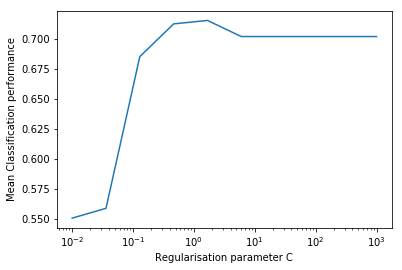

In [22]:
#Similar to how we did 1.12

penalty = np.logspace(-2, 3, 10) #Number of penalties are 10
accuracy_arr = np.zeros([3, 10])

i = 0
j = 0

for train_index, test_index in kf.split(X_tr):
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y_tr[train_index], y_tr[test_index]
   
    for c in penalty:
        svm7 = SVC(kernel = 'rbf', C = c, gamma = 'auto')
        svm7.fit(X_train, y_train)
        accuracy_arr[i, j] = svm7.score(X_test, y_test)
        j += 1
    
    j = 0
    i += 1

accuracy_arr

plt.plot(penalty, accuracy_arr.mean(axis = 0))
plt.xlabel("Regularisation parameter C")
plt.ylabel("Mean Classification performance")
plt.xscale("log")

print("The highest obtained mean accuracy is {}" .format(np.round(np.max(accuracy_arr.mean(axis = 0)), decimals = 4)))
print("The value of C which yielded it is {}" .format(np.round(penalty[np.argmax(accuracy_arr.mean(axis = 0))], decimals = 4)))

svm8 = SVC(kernel='rbf', C = penalty[np.argmax(accuracy_arr.mean(axis = 0))])
svm8.fit(X_tr, y_tr)
print("The classification accuracy on the training set is {}" .format(np.round(svm8.score(X_tr, y_tr), decimals = 4)))
print("The classification accuracy on the validation set is {}" .format(np.round(svm8.score(X_val, y_val), decimals = 4)))


### ========== Question 1.22 --- [5 marks] ==========
Now we turn to the kernel coefficient `gamma` parameter. By using the same procedure as in the previous question, estimate the classification accuracy of an SVM classifier with RBF kernel while you vary the `gamma` parameter in a logarithmic range `logspace(-5, 0, 10)`. Fix the penalty parameter `C=1.0`.

Plot the mean cross-validated classification accuracy against the parameter `gamma` by using a log-scale for the x-axis. Display the highest obtained mean accuracy score and the value of `gamma` which yielded it.  Label axes appropriately.

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

The highest obtained mean accuracy is 0.7162
The value of gamma which yielded it is 0.0017
The classification accuracy on the training set is 0.8911
The classification accuracy on the validation set is 0.7269


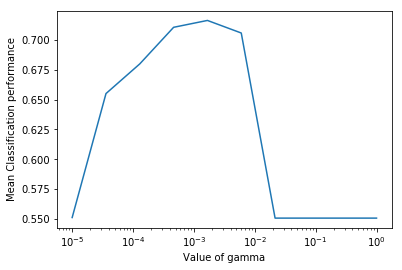

In [23]:

gamm = np.logspace(-5, 0, 10) #Number of penalties are 10
accuracy_arr2 = np.zeros([3, 10])

i = 0
j = 0

for train_index, test_index in kf.split(X_tr):
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y_tr[train_index], y_tr[test_index]
   
    for g in gamm:
        svm9 = SVC(kernel = 'rbf', C = 1.0, gamma = g)
        svm9.fit(X_train, y_train)
        accuracy_arr2[i, j] = svm9.score(X_test, y_test)
        j += 1
    
    j = 0
    i += 1

accuracy_arr2

plt.plot(gamm, accuracy_arr2.mean(axis = 0))
plt.xlabel("Value of gamma")
plt.ylabel("Mean Classification performance")
plt.xscale("log")

print("The highest obtained mean accuracy is {}" .format(np.round(np.max(accuracy_arr2.mean(axis = 0)), decimals = 4)))
print("The value of gamma which yielded it is {}" .format(np.round(gamm[np.argmax(accuracy_arr2.mean(axis = 0))], decimals = 4)))

svm10 = SVC(kernel='rbf', C = 1.0, gamma = gamm[np.argmax(accuracy_arr2.mean(axis = 0))])
svm10.fit(X_tr, y_tr)
print("The classification accuracy on the training set is {}" .format(np.round(svm10.score(X_tr, y_tr), decimals = 4)))
print("The classification accuracy on the validation set is {}" .format(np.round(svm10.score(X_val, y_val), decimals = 4)))


### ========== Question 1.23 --- [7 marks] ==========
Now we wish to tune both the `C` and `gamma` parameters simultaneously. To save computational time, we will now constrain the parameter search space. Define a `4 X 4` grid for the two parameters, as follows:
* `C`: `np.logspace(-2, 1, 4)`
* `gamma`: `np.logspace(-4, -1, 4)`

Estimate the mean cross-validated classification accuracy by using training data only and all possible configurations for the two parameters. 

Use a [heatmap](https://seaborn.github.io/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap) to visualise the mean cross-validated classification accuracy for all `C`-`gamma` pairs. Label axes appropriately and display the values for `C` and `gamma` for the best performing configuration. 

Finally, by using the optimal configuration, train a classifier (without using cross-validation) and report the classification accuracy on the training and validation sets.

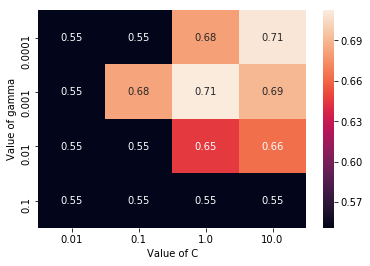

The highest obtained mean accuracy is 0.7124
The value of C which yielded it is 1.0
The value of gamma which yielded it is 0.001
The classification accuracy on the training set is 0.8347
The classification accuracy on the validation set is 0.7215


In [24]:
penalty2 = np.logspace(-2, 1, 4)
gamm2 = np.logspace(-4, -1, 4)

accuracy_arr3 = np.zeros([3,4,4]) #need a 4 X 4 grid

i = 0
j = 0
k = 0

for train_index, test_index in kf.split(X_tr):
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y_tr[train_index], y_tr[test_index]
   
#For every c and gamma value combination
    for c in penalty2:
        for g in gamm2:
            svm11 = SVC(kernel = 'rbf', C = c, gamma = g)
            svm11.fit(X_train, y_train)
            accuracy_arr3[i, j, k] = svm11.score(X_test, y_test)
            j += 1
        j = 0
        k += 1    
    k = 0
    i += 1

#Defining values to make usage easier
all_means = accuracy_arr3.mean(axis = 0)

#unravel index returns the tuple of the position for the indice we want which is the max value
opt_mean = np.unravel_index(all_means.argmax(), all_means.shape)
opt_gamma = gamm2[opt_mean[0]]
opt_penal = penalty2[opt_mean[1]]

ax = sns.heatmap(all_means, xticklabels=(penalty2), yticklabels=(gamm2), annot = True)
ax.set_xlabel("Value of C")
ax.set_ylabel("Value of gamma")
plt.show()


print("The highest obtained mean accuracy is {}" .format(np.round(all_means[opt_mean], decimals = 4)))
print("The value of C which yielded it is {}" .format(np.round(opt_penal, decimals = 4)))
print("The value of gamma which yielded it is {}" .format(np.round(opt_gamma, decimals = 4)))

svm12 = SVC(kernel='rbf', C = opt_penal, gamma = opt_gamma)
svm12.fit(X_tr, y_tr)
print("The classification accuracy on the training set is {}" .format(np.round(svm12.score(X_tr, y_tr), decimals = 4)))
print("The classification accuracy on the validation set is {}" .format(np.round(svm12.score(X_val, y_val), decimals = 4)))


### ========== Question 1.24 --- [3 marks] ==========
Is the classification accuracy on the validation set higher than in previous questions (1.22-1.23)? If not, can you explain why? Can you think of a way of further improving the performance of the classifier? You don't need to implement your suggestion at this stage. Would there be any associated problems with your suggested approach? 

The classificiation accuracy on the validation set is quite similar to that in the previous questions. This could be possibly because the optimal value of C lies in a smaller range as seen in question 1.21, where the classification accuracy starts attaining very high rates for C values between 0.1 and 10. Similarly, the accuracy is very high for gamma in the range 0.001 to 0.01 as seen in 1.22. This is proven by the fact that the best classifier performance we get in this case is for C=1.0 and gamma=0.1 which both fall in the ranges specified 

One way of improving the classifier performance could be limiting the range of search for C and gamma in the ranges specified here.  

A problem with this is that we will need many many more values in these small ranges for both the parameters to find optimum values and this will lead to a much bigger accuracy score matrix and much slower computation rates. 

### ========== Question 1.25 --- [5 marks] ==========
Now we want to evaluate the performance of an SVM classifier with polynomial kernel. Once again, we will tune the `degree` parameter by using cross-validation (similarly to what we did in Questions 1.21 and 1.22).

By using the `K-fold` iterator from Question 1.11 and training data only, estimate the classification accuracy of polynomial SVM classifier, while you vary the `degree` parameter in the range `np.arange(1,8)`. 

Plot the mean cross-validated classification accuracy against the polynomial degree. Display the highest obtained mean accuracy score and the value of the `degree` parameter which yielded it. Label axes appropriately. 

Finally, train a classifier by using the optimal value for this parameter (without using cross-validation at this stage) and report the classification accuracy on the training and validation sets. 

The highest obtained mean accuracy is 0.7028
The value of polynomial degree which yielded it is 1
The classification accuracy on the training set is 0.7836
The classification accuracy on the validation set is 0.6891


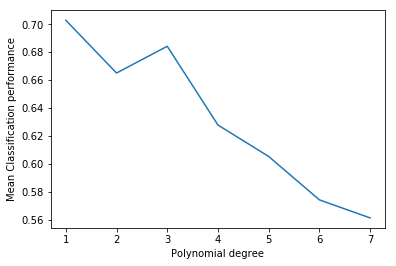

In [25]:
deg = np.arange(1,8)

accuracy_arr4 = np.zeros([3, 7])

i = 0
j = 0

for train_index, test_index in kf.split(X_tr):
    X_train, X_test = X_tr[train_index], X_tr[test_index]
    y_train, y_test = y_tr[train_index], y_tr[test_index]
   
    for d in deg:
        svm13 = SVC(kernel = 'poly', degree = d)
        svm13.fit(X_train, y_train)
        accuracy_arr4[i, j] = svm13.score(X_test, y_test)
        j += 1
    
    j = 0
    i += 1

accuracy_arr4

plt.plot(deg, accuracy_arr4.mean(axis = 0))
plt.xlabel("Polynomial degree")
plt.ylabel("Mean Classification performance")

print("The highest obtained mean accuracy is {}" .format(np.round(np.max(accuracy_arr4.mean(axis = 0)), decimals = 4)))
print("The value of polynomial degree which yielded it is {}" .format(np.round(deg[np.argmax(accuracy_arr4.mean(axis = 0))], decimals = 4)))

svm14 = SVC(kernel='poly', degree = deg[np.argmax(accuracy_arr4.mean(axis = 0))])
svm14.fit(X_tr, y_tr)
print("The classification accuracy on the training set is {}" .format(np.round(svm14.score(X_tr, y_tr), decimals = 4)))
print("The classification accuracy on the validation set is {}" .format(np.round(svm14.score(X_val, y_val), decimals = 4)))


### ========== Question 1.26 --- [4 marks] ==========

You might have noticted that so far, we have used cross-validation for optimising the various tuning parameters (e.g. regularisation parameter in logistic regression, SVM kernel parameters) rather than hold-out validation, although we did have access to a validation set. Why do you think this is a good/bad idea? Give one advantage and one disadvantage of the two different approaches. Which one would you trust more in practice?

It is a good idea because cross validation helps us make sure our model is generally performing well on average and adapts to the entire training data before we use it to classify any unseen data.  

An advantage of cross validation is that we don't have to worry about the uneven splitting of data as every point is in the testing set exactly once. One disadvantage is that it splits the data k times and hence the computation is very slow.

An advantage of hold out validation is that we get an estimate of how our classifier will perform on unseen data before we use it on the seperate validation set. A disadvantage is possibly high variance as the evaluation may depend heavily on which points end up in the training set and which points end up in the testing set.

In practice, we would trust cross validation even with the associated computation cost as 
it is prone to less variation.

### ========== Question 1.27 --- [6 marks] ==========

Reload the full training and validation data that contain all indicator variables for all object categories. Remove the `imgId` attribute but keep all of the class indicator variables in the dataset this time. Your training features should include all attributes except `is_person` which should be your target variable. 

Once again, use a [StandardScaler](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.StandardScaler.html) to standardise your training and validation features. Then train a Random Forest Classifier by using the entropy `criterion`, 500 `n_estimators`, and also set the `random_state` to 31. Report the classification accuracy on the training and validation sets.

Similarly to what we did in Question 1.18, order the features by decreasing importance and display the 50 most important features. 

Finally, answer the following questions:
* What do you notice by looking at the list of the best 50 features?
* How does the performance differ with respect to the case when the additional class indicator variables are not present (Question 1.16)? Relate your observations to the observed feature ranking.
* Would it be easy to make use of the results in practice? Briey explain your reasoning.

*(Hint: you might want to look at some of the [images](http://www.inf.ed.ac.uk/teaching/courses/iaml/2014/assts/asst3/images.html) to justify your explanations.)*

In [26]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partA.csv')
train_A = pd.read_csv(data_path, delimiter = ',')

data_path_2 = os.path.join(os.getcwd(), 'datasets', 'valid_images_partA.csv')
valid_A = pd.read_csv(data_path_2, delimiter = ',')

train_A.drop('imgId', axis = 1, inplace = True)
valid_A.drop('imgId', axis = 1, inplace = True)

X_tr = train_A.drop('is_person', axis = 1)
X_val = valid_A.drop('is_person', axis = 1)
y_tr = train_A['is_person']
y_val = valid_A['is_person']

scaler = preprocessing.StandardScaler().fit(X_tr)
X_tr = scaler.transform(X_tr)
X_val = scaler.transform(X_val)

clf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state=31)
clf.fit(X_tr, y_tr)
print ("Accuracy score for the training set is {}" .format(np.round(clf.score(X_tr, y_tr), decimals = 4)))
print ("Accuracy score for validation set is {}" .format(np.round(clf.score(X_val, y_val), decimals = 4)))

index = np.argsort(-clf.feature_importances_)
list2 = (train_A.drop('is_person', axis = 1).columns.values.tolist())
print ("The 50 most important features in descending value are")
print ("\n")

for i in range(50):
    print("{} {}" .format(i+1, list2[index[i]]))
    

Accuracy score for the training set is 1.0
Accuracy score for validation set is 0.7116
The 50 most important features in descending value are


1 is_cat
2 is_bird
3 dim21
4 dim51
5 dim360
6 dim4
7 dim76
8 dim398
9 dim283
10 dim479
11 dim263
12 dim343
13 dim423
14 dim485
15 dim254
16 dim461
17 dim222
18 dim356
19 dim74
20 dim288
21 dim214
22 dim348
23 dim330
24 dim217
25 dim483
26 dim90
27 dim274
28 dim347
29 dim17
30 dim427
31 dim35
32 dim326
33 dim73
34 dim312
35 dim48
36 dim25
37 dim315
38 dim322
39 dim329
40 dim500
41 dim134
42 dim206
43 is_aeroplane
44 dim96
45 dim353
46 dim442
47 dim77
48 dim440
49 dim171
50 dim154


We notice that a few of the additional class indicator variables also appear in the 50 most important features for the classifier, like is_cat, is_bird and is_aeroplane. These class attributes are classified highly because a lot of the images that contain cats and birds don't actually contain people, so these attributes actually help identify images that don't have people in them and thus have a high feature importance ranking.

A lot of normalized count vector features are present in the feature ranking but are at different ranks as compared to the list in 1.16 possibly because we used a different criterion and a different random state for this classifier. The accuracy score is not very different in both cases. 

It wouldn't make sense to use the results because we have 500 visual words for each image which are the parameters we need to use to classify the 19 odd classes. Using a class attribute to predict another class attribute's value doesn't really make sense or help us influence our model's classificaton rate by direct measures (preprocessing for example)

## Mini challenge [30%]

*Important: You are allowed to write up to a maximum of 600 words in this part of the assignment. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final classification performance of your chosen method(s) and credit will be divided accordingly.*

In this final part of the assignment we will have a mini object-recognition challenge. Using the data provided you are asked to find the best classiffier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provison that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation. 

**Important:** The classification performance metric that we will use for this part is the *cross-entropy* or *logarithmic loss* (see the labs). You should familiarise yourself with the metric by reading the `sklearn` [user guide](http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss) and [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html#sklearn.metrics.log_loss). To estimate this metric you will need to evaluate probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` classes, the method will return a `N` x `K` matrix.

We provide you with three new data sets: a training set (`train_images_partB.csv`), a validation set (`valid_images_partB.csv`), and a test set (`test_images_partB.csv`). You must use the former two for training and evaluating your models (as you see fit). Once you have chosen your favourite model (and pre-processing steps) you should apply it to the test set (for which no labels are provided). Estimate the posterior proabilities for the data points in the test set and submit your results as part of your answer. Your results will be evaluated in terms of the logarithmic loss metric. You also need to submit a brief description of the approaches you considered, your suggested final approach, and a short explanation of why you chose it. The thoroughness of the exploration and the quality of the resulting discussion is just as important as the final score of your chosen method(s) and credit will be divided accordingly.

*Hint: Feature engineering, feature combination, model combination and model parameter optimization can significantly improve performance.*

**How to submit your results**: Store the estimated probabilities for the data points in the test set in a 2D numpy array. Then execute the provided cell at the end of this notebook which uses a provided `save_predictions` function to export your results into a `.txt` file (the function will return an error if the provided array has not the right shape). The `.txt` file will be saved where your notebook lives. Submit this file along with your notebook as detailed at the top of this file.

I started off by analysing the data sets given to me. I looked at the different attributes in all the three data sets and noticed that some datapoints in the training set had exceptionally high values for means, hence I had to remove them as they were outliers affecting the data.

I cleaned the data and reassigned the training and target sets again. I then used a standard scaler to standardise the training and validation sets. Feature standardisation does not work well with data containing outliers.

I then created a dummy classifier to obtain a baseline for the log loss and accuracy performance. I created a logistic regression cv classifier with a 7 kfold iterator with c in the given ideal range to give me the smallest log loss variable. I did consider using a GridSearchCV with the scoring paramter changed to 'neg_log_loss' as this usually finds model parameters on the basis of classification score as a default.

However, I decided that looping across the different values in a specified logspace would let me visualise how the model is doing in terms of accuracy for different log loss values.

I then created an SVM classifier with an rbf kernel which gave me the lowest log loss and highest classification accuracy pair with c around 2 and gamma around 0.002. I also created a SVM classifier with polynomial kernel which gave me a high classification accuracy and low log loss for degree = 1.

I finally created a random forrest classifier which is pretty much stagnant in log loss rate after the number of estimators crossed 500. 

I decided against using cross validation with my SVM and random forrest classifiers because I was already given independent validation and testing sets and even though the log loss rate could have decreased a bit more, using the training test only for training can also help us predict how much the model generalizes. 

I also choose to leave out the other class attributes in the training set because using a class attribute to classify another class does not make sense. 


In [83]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_images_partB.csv')
train_B = pd.read_csv(data_path, delimiter = ',')
print("The number of data points in train B are {}" .format(train_B.shape[0]))
print("The number attributes in train B are {}" .format(train_B.shape[1]))


data_path_2 = os.path.join(os.getcwd(), 'datasets', 'valid_images_partB.csv')
valid_B = pd.read_csv(data_path_2, delimiter = ',')
print("The number of data points in valid B are {}" .format(valid_B.shape[0]))
print("The number attributes in valid B are {}" .format(valid_B.shape[1]))

data_path_3 = os.path.join(os.getcwd(), 'datasets', 'test_images_partB.csv')
test_B = pd.read_csv(data_path_3, delimiter = ',')
print("The number of data points in test B are {}" .format(test_B.shape[0]))
print("The number attributes in test B are {}" .format(test_B.shape[1]))

The number of data points in train B are 2113
The number attributes in train B are 520
The number of data points in valid B are 1113
The number attributes in valid B are 520
The number of data points in test B are 1114
The number attributes in test B are 501


In [64]:
#First we are gonna preprocess the data

list = []
for i in range(1, 501):
    list.append(train_B.columns[i])
    
Xtr = train_B[list]
Xval = valid_B[list]
Xtest = test_B[list]
ytr = train_B['is_person']
yval = valid_B['is_person']
ytest = test_B['is_person']

#for i in Xtr.mean():
   #print (i)
#A few documents have very high means and are outliers

Xtr

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
0,0.002232,0.000558,0.002790,0.000837,0.001674,0.001953,0.001395,0.002232,0.003627,0.006138,...,0.001116,0.000558,0.005301,0.001116,0.004185,0.000837,0.006975,0.001953,0.001674,0.000558
1,0.001563,0.000391,0.007422,0.003516,0.003906,0.005078,0.001953,0.002344,0.001953,0.001953,...,0.001953,0.000000,0.008203,0.001172,0.007422,0.004297,0.001563,0.000000,0.003125,0.004687
2,0.000521,0.000000,0.000000,0.001042,0.001563,0.005729,0.000521,0.002083,0.003646,0.005208,...,0.002083,0.000000,0.000521,0.000521,0.002083,0.000000,0.000000,0.000521,0.003646,0.000000
3,0.002976,0.002232,0.004464,0.000372,0.000372,0.002232,0.000000,0.003720,0.000000,0.002232,...,0.001488,0.000000,0.015253,0.000744,0.001488,0.000744,0.000372,0.001860,0.000000,0.001860
4,0.001359,0.000340,0.001359,0.000340,0.001359,0.002038,0.002378,0.000000,0.003397,0.003397,...,0.002038,0.000679,0.000000,0.001359,0.001019,0.003736,0.008152,0.003736,0.000679,0.001698
5,0.000000,0.006324,0.000372,0.000372,0.000372,0.000372,0.000744,0.008185,0.000372,0.000372,...,0.000372,0.005580,0.000744,0.000000,0.000000,0.000000,0.000000,0.001116,0.000372,0.000372
6,0.000340,0.000000,0.004416,0.000340,0.000679,0.006114,0.001359,0.002717,0.003057,0.005435,...,0.000679,0.000000,0.003057,0.001359,0.001698,0.000679,0.006454,0.002378,0.002378,0.001019
7,0.000837,0.002232,0.000279,0.000279,0.000837,0.000000,0.000279,0.006696,0.000000,0.000000,...,0.000558,0.002232,0.004185,0.000000,0.000000,0.000837,0.000000,0.000279,0.000279,0.003627
8,0.002378,0.001359,0.004755,0.001019,0.003736,0.001359,0.001019,0.004076,0.003397,0.001698,...,0.001359,0.000679,0.007133,0.001359,0.002378,0.002378,0.003736,0.002038,0.003057,0.002378
9,0.001019,0.000340,0.006454,0.001698,0.001359,0.003736,0.000000,0.004076,0.000000,0.003057,...,0.002378,0.000000,0.002717,0.002378,0.004755,0.002378,0.000679,0.003057,0.001698,0.003057


In [65]:
#Cleaning the outliers and reassigning

train_B_new = train_B.copy(deep = True)
for i in range(2113):
    if (Xtr.mean(axis = 1)[i] > 1):
        train_B_new.drop([i], inplace = True)
        
Xtr = train_B_new[list]
Xval = valid_B[list]
ytr = train_B_new['is_person']
yval = valid_B['is_person']


In [66]:
#Processing the data here 

scaler2 = preprocessing.StandardScaler().fit(Xtr)
Xtr = scaler2.transform(Xtr)
Xval = scaler2.transform(Xval)

In [67]:
#The baseline is 
cla = DummyClassifier(strategy = 'prior')
cla.fit(Xtr, ytr)
acc_score = cla.score(Xval, yval)
print("The accuracy on the set is {}" .format(np.round(acc_score, decimals = 3)))
log_loss(yval, cla.predict_proba(Xval))

The accuracy on the set is 0.527


0.69293908530150472

In [68]:
#We next train a Logistic Regression estimator

kfo = KFold(n_splits=7, random_state = 0)

cval = np.logspace(-4, 3, 40) #Using the same logspace as above
lrc = LogisticRegressionCV(Cs = cval, cv = kfo, scoring = 'neg_log_loss', solver = 'lbfgs')
lrc.fit(Xtr, ytr)

#lrc.Cs_ returns all values of C and lrc.C_ returns the optimal value

print ("The optimal value for the parameter C is {}" .format(np.round(lrc.C_[0], decimals = 4)))
log_loss(yval, lrc.predict_proba(Xval))

The optimal value for the parameter C is 0.0027


0.58040493587730013

In [69]:
#SVM with rbf model
#Using a smaller log
penalty2 = np.logspace(-1, 1, 4)
gamm2 = np.logspace(-4, 0, 4)

for c in penalty2:
    for g in gamm2:
        svm12 = SVC(kernel='rbf', C = c, gamma = g, probability = True)
        svm12.fit(Xtr, ytr)
        print("The log loss on the validation set is {}" .format(np.round(log_loss(yval, svm12.predict_proba(Xval)), decimals = 4)))
        print("The classification accuracy is {}" .format(np.round(svm12.score(Xval, yval), decimals = 4)))
        print("Value of c {} Value of gamma {}" .format(c, g))
        print ("\n")

The log loss on the validation set is 0.6192
The classification accuracy is 0.5283
Value of c 0.1 Value of gamma 0.0001


The log loss on the validation set is 0.5757
The classification accuracy is 0.6873
Value of c 0.1 Value of gamma 0.00215443469003


The log loss on the validation set is 0.6929
The classification accuracy is 0.5265
Value of c 0.1 Value of gamma 0.0464158883361


The log loss on the validation set is 0.6929
The classification accuracy is 0.5265
Value of c 0.1 Value of gamma 1.0


The log loss on the validation set is 0.5996
The classification accuracy is 0.6703
Value of c 0.464158883361 Value of gamma 0.0001


The log loss on the validation set is 0.5483
The classification accuracy is 0.7089
Value of c 0.464158883361 Value of gamma 0.00215443469003


The log loss on the validation set is 0.6929
The classification accuracy is 0.5265
Value of c 0.464158883361 Value of gamma 0.0464158883361


The log loss on the validation set is 0.6929
The classification accuracy is 0.

In [53]:
#SVM with poly model - degree 1 does the best

deg = np.arange(1,8)
for d in deg:
    svm14 = SVC(kernel='poly', degree = d, probability = True)
    svm14.fit(Xtr, ytr)
    print("The classification accuracy on the validation set is {}" .format(np.round(svm14.score(Xval, yval), decimals = 4)))
    print("The log loss on the validation set is {}" .format(np.round(log_loss(yval, svm14.predict_proba(Xval)), decimals = 4)))
    print ("The degree is {}" .format(d))

The classification accuracy on the validation set is 0.6891
The log loss on the validation set is 0.5878
The degree is 1
The classification accuracy on the validation set is 0.6855
The log loss on the validation set is 0.5914
The degree is 2
The classification accuracy on the validation set is 0.7017
The log loss on the validation set is 0.6001
The degree is 3
The classification accuracy on the validation set is 0.6774
The log loss on the validation set is 0.6431
The degree is 4
The classification accuracy on the validation set is 0.6128
The log loss on the validation set is 0.6638
The degree is 5
The classification accuracy on the validation set is 0.5624
The log loss on the validation set is 0.6821
The degree is 6
The classification accuracy on the validation set is 0.5463
The log loss on the validation set is 0.6889
The degree is 7


In [57]:
#RandomForrestClassifier - best accuracy and log loss combination is with n = 1000

n_estim = [1,2,5,10,20,50,100,200,500,1000, 2000]

for n in n_estim:
    clf = RandomForestClassifier(n_estimators = n, random_state=42)
    clf.fit(Xtr, ytr)
    print ("Accuracy score for the validation set is {}" .format(np.round(clf.score(Xval, yval), decimals = 4)))
    print ("Log loss on the validation set is {}" .format(np.round(log_loss(yval, clf.predict_proba(Xval)), decimals = 4)))
    print ("The value of n is {}" .format(n))

Accuracy score for the validation set is 0.5795
Log loss on the validation set is 14.523
The value of n is 1
Accuracy score for the validation set is 0.584
Log loss on the validation set is 7.3991
The value of n is 2
Accuracy score for the validation set is 0.6379
Log loss on the validation set is 1.6092
The value of n is 5
Accuracy score for the validation set is 0.6316
Log loss on the validation set is 0.7511
The value of n is 10
Accuracy score for the validation set is 0.6523
Log loss on the validation set is 0.6101
The value of n is 20
Accuracy score for the validation set is 0.6855
Log loss on the validation set is 0.5916
The value of n is 50
Accuracy score for the validation set is 0.6891
Log loss on the validation set is 0.59
The value of n is 100
Accuracy score for the validation set is 0.6999
Log loss on the validation set is 0.5852
The value of n is 200
Accuracy score for the validation set is 0.6927
Log loss on the validation set is 0.5843
The value of n is 500
Accuracy scor

In [96]:
Xtest = test_B[list]
ytest = test_B['is_person']
Xtest = scaler2.transform(Xtest)

ytest
test_B

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500,is_person
0,0.000000,0.000000,0.000000,0.001019,0.001698,0.000679,0.000679,0.000000,0.005435,0.009171,...,0.000000,0.004755,0.000340,0.000000,0.000340,0.003397,0.000679,0.000679,0.008832,?
1,0.000372,0.000000,0.014137,0.000372,0.002232,0.001116,0.000744,0.008185,0.000372,0.001116,...,0.000000,0.007068,0.000372,0.004464,0.003348,0.000744,0.004836,0.000000,0.010045,?
2,0.001019,0.000679,0.006793,0.001359,0.000340,0.001359,0.002717,0.002038,0.001359,0.000679,...,0.000340,0.020720,0.002717,0.003397,0.001019,0.001019,0.002378,0.002378,0.003057,?
3,0.001379,0.000460,0.003217,0.002757,0.003217,0.004596,0.000919,0.003676,0.001838,0.004596,...,0.000460,0.007353,0.000460,0.002298,0.001379,0.005055,0.006434,0.003676,0.000919,?
4,0.001019,0.000340,0.014946,0.003057,0.000340,0.003736,0.000679,0.002038,0.001019,0.002038,...,0.000000,0.007812,0.002378,0.003397,0.003736,0.002717,0.001359,0.002717,0.007473,?
5,0.002038,0.000679,0.001019,0.004076,0.002378,0.001019,0.002378,0.002038,0.001019,0.001698,...,0.000000,0.000679,0.000679,0.001698,0.002038,0.003736,0.002717,0.003397,0.001359,?
6,0.001698,0.000679,0.002378,0.002038,0.002378,0.001019,0.001359,0.003057,0.002717,0.005435,...,0.002038,0.001698,0.001359,0.004416,0.001019,0.007812,0.001359,0.001019,0.002378,?
7,0.002038,0.000340,0.006454,0.005095,0.001019,0.001019,0.001019,0.001019,0.001019,0.004076,...,0.000000,0.003736,0.000340,0.001698,0.000679,0.006114,0.002038,0.003057,0.001019,?
8,0.000355,0.014205,0.001065,0.000000,0.000000,0.000000,0.000710,0.000000,0.000000,0.001420,...,0.005327,0.000710,0.000000,0.001420,0.001420,0.003551,0.000000,0.001776,0.004261,?
9,0.002038,0.001359,0.000679,0.001359,0.002717,0.006114,0.002717,0.000679,0.012908,0.005774,...,0.000679,0.002038,0.000679,0.001019,0.001019,0.010190,0.001698,0.002378,0.000679,?


In [97]:
#The final model is

svm_final = SVC(kernel='rbf', C = 2.15443469003, gamma = 0.00215443469003, probability = True)
svm_final.fit(Xtr, ytr)
print("The log loss on the validation set is {}" .format(np.round(log_loss(yval, svm_final.predict_proba(Xval)), decimals = 4)))
test_images_partB_pred_proba = svm_final.predict_proba(Xtest)
test_images_partB_pred_proba.shape

The log loss on the validation set is 0.5464


(1114, 2)

In [98]:
# Execute this cell to export your results
from numpy import savetxt
def save_predictions(pred_proba):
    if pred_proba.shape != (1114,2):
        raise ValueError('Predicted probabilities array is not the right shape.')
    
    savetxt('assignment_3_predictions.txt', pred_proba)

# You need to replace "test_images_partB_pred_proba"
# with the name of the array which contains the probability 
# estimates for the data in the test set.
save_predictions(test_images_partB_pred_proba) 

# Appendix

## More information about visual words

Visual words are based on [Scale-invariant feature transforms (SIFT)](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform). SIFT features are essentially local orientation histograms and capture the properties of small image regions. They possess attractive invariance properties which make them well suited for our task (you can read more about SIFT features in [D.Lowe, IJCV 60(2):91- 110, 2004](http://link.springer.com/article/10.1023/B:VISI.0000029664.99615.94), but the details don't matter for the purpose of this assignment). Each SIFT feature is a 128 dimensional vector. From each image many SIFT features are extracted, typically > 2500 per image (features are extracted at regular intervals using a 15 pixel grid and at 4 different scales). To obtain visual words a representative subset of all extracted SIFT features from all images is chosen and clustered with k-means using 500 centres (such use of the k-means algorithm will be discussed in detail during the lecture). These 500 cluster centres form our visual words. The representation of a single image is obtained by first assigning each SIFT feature extracted from the image to the appropriate cluster (i.e. we determine the visual word corresponding to each feature by picking the closest cluster centre). We then count the number of features from that image assigned to each cluster (i.e. we determine how often each visual word is present in the image). This results in a 500 dimensional count vector for each image (one dimension for each visual word). The normalized version of this count vector gives the final representation of the image (normalized means that we divide the count vector by the total number of visual words in the image, i.e. the normalized counts sum to 1 for each image)